## importing necessary libraries

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import math

## we are reading our californina housing price dataset in file "housing.cvs" using read_csv() method of pandas

In [115]:
data =pd.read_csv("datasets/housing.csv")

print("data.shape : \n",data.shape)

data.head()

data.shape : 
 (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Cleaning 
##  making sure that our data is icluding only those features which are having integer or float as datatype 
### we do so by using pandas' select_dtypes() method.

In [116]:
data=data.select_dtypes(include=('float64','int64'))

### now we have removed 'ocean_proximity' feature from our data successively

In [117]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [118]:
data.shape

(20640, 9)

# Data Normalisation
## Here we are doing standard normalisation by subtraction data by mean and dividing it with standard deviation so that our data can be standardised with mean=0 and std=1

In [119]:
print("Before Normalisation: \n")
print("data.mean(): ",np.array(data.mean()))
print("data.std(): ",np.array(data.std()))

data =(data -data.mean())/data.std()

print("\n After Normalisation: \n")
print("data.mean(): ",np.array(data.mean()))
print("data.std(): ",np.array(data.std()))

Before Normalisation: 

data.mean():  [-1.19569704e+02  3.56318614e+01  2.86394864e+01  2.63576308e+03
  5.37870553e+02  1.42547674e+03  4.99539680e+02  3.87067100e+00
  2.06855817e+05]
data.std():  [2.00353172e+00 2.13595240e+00 1.25855576e+01 2.18161525e+03
 4.21385070e+02 1.13246212e+03 3.82329753e+02 1.89982172e+00
 1.15395616e+05]

 After Normalisation: 

data.mean():  [-1.42921497e-12 -7.63668091e-14  1.81739851e-15 -9.59080199e-17
 -1.99180520e-16 -2.83652839e-16  7.56386502e-17 -2.52380965e-14
  3.76787318e-16]
data.std():  [1. 1. 1. 1. 1. 1. 1. 1. 1.]


# making sure that our data is not having any NaN value
### check which feature is having NaN values with pandas.isna() method

In [123]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [124]:
#so here we find that 203 rows are there that are having NaN value in "total_bedrooms" feature
# we will drop those rows by dropna() method with axis=0 i.e., row-wise.

data=data.dropna(axis=0)

In [125]:
data.shape

(20433, 9)

## splitting data into X (features) and Y (target_variable)

In [130]:
X=data.drop('median_house_value',axis=1).copy()
Y=data['median_house_value']

## splitting of data into training and testing

### writing train_split_data 

In [131]:
def train_test_split(X,Y,test_size=0.25,train_size=.75):
    
    train_size=1-test_size
    
    x_train=np.array(X[: int(train_size*X.shape[0])])
    x_test=np.array(X[ int(train_size*X.shape[0]):])
    
    y_train=Y[: int(train_size*len(Y))]
    y_train=np.array(y_train)
    y_train=y_train.reshape(len(y_train),1)
    
    y_test=Y[int(train_size*len(Y)):]
    y_test=np.array(y_test)
    y_test=y_test.reshape(len(y_test),1)
    
    return x_train,x_test,y_train,y_test

## In Polynomial Regression, we raise the power of features. 

### making a list having powers of the features.

In [496]:
power_list=[i+1 for i in range(X.shape[1])]
power_list

[1, 2, 3, 4, 5, 6, 7, 8]

In [497]:
X_temp=X.copy()
for i in range(len(power_list)):
    X_temp.iloc[:,i]=X_temp.iloc[:,i]**power_list[i]
    


In [498]:
X_temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327803,1.107804,0.947310,0.419518,-0.860069,0.855928,-0.849749,9.135063e+02
1,-1.322812,1.088181,-0.223653,17.518105,4.454929,0.408586,36.213517,8.751827e+02
2,-1.332794,1.078436,6.394841,0.082375,-0.383436,0.305696,-0.304099,1.019861e+02
3,-1.337785,1.078436,6.394841,0.151808,-0.191818,0.202025,-0.114523,5.739155e-01
4,-1.337785,1.078436,6.394841,0.045713,-0.085825,0.192439,-0.039016,7.577246e-16


In [499]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881


## splitting X,Y into training testing part using train_test_split()

In [500]:
x_train,x_test,y_train,y_test=train_test_split(X_temp,Y)

# initiallising the weights and bias from standard normal distribution

In [501]:
weights0=np.random.rand(X.shape[1],1)
bias0=np.random.rand(1,1)

In [502]:
def curve(m,x,c):
    return (np.matmul(x,m)+c)
def error(m,x,c,y):
    return (np.mean((curve(m,x,x)-y)**2))

def derivative_wrt_weights(m,x,c,y):
    derivatives=2*(np.mean(np.multiply(x,curve(m,x,c)-y),axis=0))
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(x.shape[1],1)
    return derivatives
     

def derivative_wrt_bias(m,x,c,y):
    return (2*np.mean(curve(m,x,c)-y)) 

def scalar(x):
    return (x-np.mean(x))/np.std(x)

def accuracy(error,y):
    return (1 -error/np.sum(y**2))*100

In [552]:
def model_result(alpha,num_of_iteration):
    weights=weights0
    bias=bias0
    lr=[]
    error_cost=[]
    for i in range(num_of_iteration):
        #alpha=alpha /((1.0085 )**i)
       # alpha =alpha*(i+.9) *.0005
        
      #  alpha=alpha/(1.01 + (i%100)*.00001) 
    
        alpha =math.pow(alpha,1.0005)*.00001 if i%500==0 and 1>10 else math.pow(alpha,1.0005)
        
        weights = weights - alpha * derivative_wrt_weights(weights,x_train,bias,y_train)
        bias = bias - alpha * derivative_wrt_bias(weights,x_train,bias,y_train)
        
        error_cost.append(error(weights,x_train,bias,y_train))
        print("Error is: ",error_cost[i])
        lr.append(alpha)
    print("lr func")
    plt.plot(lr)
    plt.show()
    print("cost func")
    plt.plot(error_cost)
    print("Accuracy is: ",accuracy(error_cost[-1],y_train))
    print("At endError is: ",error(weights,x_train,bias,y_train))


In [553]:
.0000000000001/(1.015)**150

1.071750420592843e-14

Error is:  38333491647042.875
Error is:  38322582200337.7
Error is:  38311895684019.56
Error is:  38301427572833.83
Error is:  38291173434273.555
Error is:  38281128926601.51
Error is:  38271289796918.55
Error is:  38261651879276.32
Error is:  38252211092833.734
Error is:  38242963440055.45
Error is:  38233905004952.11
Error is:  38225031951360.23
Error is:  38216340521261.68
Error is:  38207827033141.04
Error is:  38199487880380.18
Error is:  38191319529689.09
Error is:  38183318519572.01
Error is:  38175481458827.836
Error is:  38167805025084.26
Error is:  38160285963364.36
Error is:  38152921084685.24
Error is:  38145707264687.71
Error is:  38138641442296.17
Error is:  38131720618408.21
Error is:  38124941854612.8
Error is:  38118302271936.96
Error is:  38111799049619.445
Error is:  38105429423911.5
Error is:  38099190686903.63
Error is:  38093080185377.8
Error is:  38087095319684.59
Error is:  38081233542644.625
Error is:  38075492358473.62
Error is:  38069869321730.61
Error is:  3

Error is:  37808296656185.984
Error is:  37808273596238.04
Error is:  37808251068660.96
Error is:  37808229061420.87
Error is:  37808207562749.914
Error is:  37808186561140.63
Error is:  37808166045340.27
Error is:  37808146004345.336
Error is:  37808126427396.06
Error is:  37808107303971.234
Error is:  37808088623783.07
Error is:  37808070376772.016
Error is:  37808052553101.9
Error is:  37808035143155.086
Error is:  37808018137527.664
Error is:  37808001527024.836
Error is:  37807985302656.43
Error is:  37807969455632.375
Error is:  37807953977358.336
Error is:  37807938859431.52
Error is:  37807924093636.5
Error is:  37807909671941.055
Error is:  37807895586492.25
Error is:  37807881829612.484
Error is:  37807868393795.73
Error is:  37807855271703.65
Error is:  37807842456162.12
Error is:  37807829940157.45
Error is:  37807817716833.0
Error is:  37807805779485.75
Error is:  37807794121562.81
Error is:  37807782736658.27
Error is:  37807771618509.914
Error is:  37807760760996.08
Erro

Error is:  37807318048055.305
Error is:  37807318041971.05
Error is:  37807318036051.73
Error is:  37807318030292.9
Error is:  37807318024690.31
Error is:  37807318019239.78
Error is:  37807318013937.26
Error is:  37807318008778.81
Error is:  37807318003760.58
Error is:  37807317998878.82
Error is:  37807317994129.91
Error is:  37807317989510.266
Error is:  37807317985016.44
Error is:  37807317980645.06
Error is:  37807317976392.86
Error is:  37807317972256.67
Error is:  37807317968233.33
Error is:  37807317964319.85
Error is:  37807317960513.28
Error is:  37807317956810.734
Error is:  37807317953209.445
Error is:  37807317949706.664
Error is:  37807317946299.76
Error is:  37807317942986.16
Error is:  37807317939763.34
Error is:  37807317936628.87
Error is:  37807317933580.36
Error is:  37807317930615.49
Error is:  37807317927732.01
Error is:  37807317924927.734
Error is:  37807317922200.516
Error is:  37807317919548.27
Error is:  37807317916968.97
Error is:  37807317914460.664
Error i

Error is:  37807317827418.91
Error is:  37807317827418.3
Error is:  37807317827417.71
Error is:  37807317827417.14
Error is:  37807317827416.586
Error is:  37807317827416.05
Error is:  37807317827415.54
Error is:  37807317827415.04
Error is:  37807317827414.55
Error is:  37807317827414.086
Error is:  37807317827413.625
Error is:  37807317827413.18
Error is:  37807317827412.76
Error is:  37807317827412.35
Error is:  37807317827411.945
Error is:  37807317827411.555
Error is:  37807317827411.19
Error is:  37807317827410.81
Error is:  37807317827410.47
Error is:  37807317827410.125
Error is:  37807317827409.79
Error is:  37807317827409.484
Error is:  37807317827409.17
Error is:  37807317827408.88
Error is:  37807317827408.586
Error is:  37807317827408.3
Error is:  37807317827408.03
Error is:  37807317827407.77
Error is:  37807317827407.52
Error is:  37807317827407.29
Error is:  37807317827407.055
Error is:  37807317827406.82
Error is:  37807317827406.59
Error is:  37807317827406.37
Error i

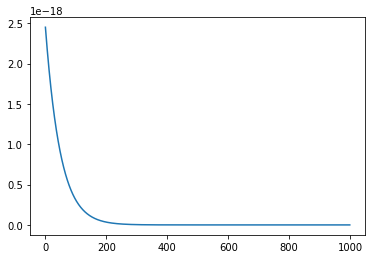

cost func
Accuracy is:  -263423444016.60623
At endError is:  37807317827401.19


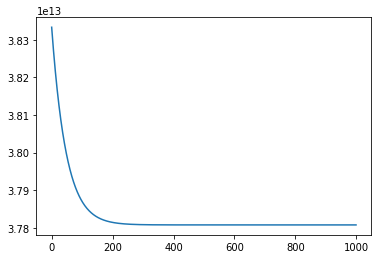

In [567]:
 model_result(alpha=.0000000000000000025,num_of_iteration=1000)

In [573]:
np.mean((curve(weights0,x_train,bias0) - y_train)/y_train)

-46902.39322852374

In [570]:
y_train

array([[ 2.12957989],
       [ 1.3141243 ],
       [ 1.25866292],
       ...,
       [-0.99878852],
       [-0.06807726],
       [-0.58629452]])

In [ ]:
curve